In [ ]:
#leer el csv

import pandas as pd
import copy, pprint

url = 'https://raw.githubusercontent.com/Jhonatan0001/Laboratorio/main/co_properties_final.csv'
df = pd.read_csv(url)

list_properties = df.values.tolist()

properties = [Property(x[0],x[1],x[2],x[3],x[4],x[5],x[6],x[7],x[8],x[9],x[10],x[11]) for x in list_properties]

In [ ]:
class QueueP:
    def __init__(self, len) -> None:
        self.__info = []
        self.__len = len

    def add(self, data):
        if len(self.__info) == self.__len:
            print("La cola esta llena")
            return
        self.__info.append(data)

    def pop(self):
        if len(self.__info) == 0:
            print("La pila esta vacia")
            return
        return self.__info.pop(0)

    def is_empty(self):
        return not bool(self.__info)

In [ ]:
from typing import List
class Property:

  def __init__(self, title : str, department: str, city : str, property_type : str, latitude : int, longitude: int, surface_total : int, surface_covered : int, bedrooms : int, bathrooms : int, operation_type : str, price: int) -> None:
    self.title = title
    self.department = department
    self.city = city
    self.property_type = property_type
    self.latitude = latitude
    self.longitude = longitude
    self.surface_total = surface_total
    self.surface_covered = surface_covered
    self.bedrooms = bedrooms
    self.bathrooms = bathrooms
    self.operation_type = operation_type
    self.price = price

  def __repr__(self) -> str:
    rep = f'[{self.title}, {self.department}, {self.city}, {self.property_type}, {self.latitude}, {self.longitude}, {self.surface_total}, {self.surface_covered}, {self.bedrooms}, {self.bathrooms}, {self.operation_type}, {self.price}, {self.metric}]'
    return str(rep)


In [ ]:
class Node:   #clase nodo
    def __init__(self, info: "Property"):
        self.info = info
        self.nivel = 0
        self.metric = float(self.info.price/self.info.surface_total)  # se define la metrica en cada nodo al momento de crearlo
        #self.metric2 = float("{0:.2}".format(self.info.longitude))
        self.metric2 = float((self.info.price/self.info.surface_covered) * (self.info.surface_covered * 0.1 * self.info.bedrooms + self.info.surface_covered * 0.05))
        self.left = None
        self.right = None
        self.height = 1

    def code(self)-> str:
      code = self.info.title.split(" ")
      return code[-1]


    def balance(self):  #calcula el factor de equilibrio del nodo
        return height(self.right) - height(self.left)

    def update_height(self):     #actualiza la altura del nodo (al momento de insertar o eliminar)
        if self.left is not None:
          left_height = height(self.left)
        else:
          left_height = 0
        if self.right is not None:
          right_height = height(self.right)
        else:
          right_height = 0
        self.height = 1 + max(right_height, left_height)

def height(node):        #calcula la altura de un nodo
  if node is None:
      return 0
  else:
      left_height = height(node.left)
      right_height = height(node.right)
      return 1 + max(left_height, right_height)





In [ ]:
from typing import Any, Optional, Tuple
import graphviz as gp
import folium
from IPython.display import display
nodos_desbalanceados =[]  #se inicializa una lista para tener los nodos desbalanceados en cada insercion

class Tree:    #se define la clase arbol


  def lvOrder(self,queue):     #levelOrder recursivo
          if not queue.is_empty():
              current = queue.pop()
              print(current.metric,current.metric2)
              if current.left:
                  queue.add(current.left)
              if current.right:
                  queue.add(current.right)
              self.lvOrder(queue)
          else:
              return

  def __init__(self):
    self.root = None
    self.balanced = True

  def __asignar_nvl(self, nodo, padre):
        if nodo is None:
            return 0
        else:
            if not nodo == self.root:
                nodo.nivel = padre.nivel + 1
            #print(nodo)
            altura_izquierda = self.__asignar_nvl(nodo.left, nodo)
            altura_derecha = self.__asignar_nvl(nodo.right, nodo)

  def asignar_nivel(self):
        #print("\n Se asigna el nivel")
        self.root.nivel = 0
        self.__asignar_nvl(self.root, None)

  def plot_tree(self) -> "gp.graphs":    #funcion para graficar el arbol
    plot = gp.Digraph()
    code = self.root.info.title.split(" ")   #usamos el codigo del titulo como representacion del nodo
    plot.node(str(code[-1]))

    def add_edges(node) -> None:                      #creamos los vertices hijos y agregamos la arista entre ellos
      if node.left:
        code_left = node.left.info.title.split(" ")
        code = node.info.title.split(" ")
        plot.node(str(code_left[-1]))
        plot.edge(str(code[-1]), str(code_left[-1]))
        add_edges(node.left)
      if node.right:
        code_right = node.right.info.title.split(" ")
        code = node.info.title.split(" ")
        plot.node(str(code_right[-1]))
        plot.edge(str(code[-1]), str(code_right[-1]))
        add_edges(node.right)

    add_edges(self.root)

    return plot

  def plot_tree_metric(self) -> "gp.graphs":  #funcion para graficar el arbol por metricas

    plot = gp.Digraph()
    code = self.root.metric
    plot.node(str(code))

    def add_edges(node) -> None:
      if node.left:
        code_left = node.left.metric
        code = node.metric
        plot.node(str(code_left))
        plot.edge(str(code), str(code_left))
        add_edges(node.left)
      if node.right:
        code_right = node.right.metric
        code = node.metric
        plot.node(str(code_right))
        plot.edge(str(code), str(code_right))
        add_edges(node.right)

    add_edges(self.root)

    return plot

  def verify_tree_balance(self, root: "Node"): #verifica el factor de balanceo de todos los nodos del arbol (desde las hojas hasta la raiz)

    if root is not None:
          self.verify_tree_balance(root.left)
          self.verify_tree_balance(root.right)

          if root.balance() <-1 or root.balance() > 1:
            self.balanced = False
            nodos_desbalanceados.append(root)

          return nodos_desbalanceados  #retorna los nodos desbalanceados


  def balance_tree(self, nodo_desbalanceado: "Node"): #balancea el arbol luego de insertar o eliminar un nodo

    if not self.balanced: #verifica que el arbol no este balanceado
          if nodo_desbalanceado.balance() == 2 and nodo_desbalanceado.right.balance() >=0: #caso rotacion simple izquierda

            self.rotacion_izq(nodo_desbalanceado)

          elif nodo_desbalanceado.balance() == -2 and nodo_desbalanceado.left.balance() <=0: #caso rotacion simple derecha

            self.rotacion_der(nodo_desbalanceado)

          elif nodo_desbalanceado.balance() == 2:      #caso rotacion doble derecha izquierda

            self.doble_der_izq(nodo_desbalanceado)

          else:                                      #caso rotacion doble izquierda derecha

            self.doble_izq_der(nodo_desbalanceado)

          self.verify_tree_balance(self.root)             #se muestra que haya quedado balanceado

    nodos_desbalanceados.clear()  #reinicio de la lista de nodos desbalanceados
    self.balanced = True        #el arbol queda balanceado


  def rotacion_izq(self, nodo: "Node") -> "Node": #rotacion simple izquierda
    if nodo is not None:
        actual, padre = self.search_node(nodo)
        if nodo == self.root:

          self.root = nodo.right
        aux = nodo.right
        if aux.left is not None:
          nodo.right = aux.left
        else:
          nodo.right = None
        aux.left = nodo
        if padre is not None:
          if padre.metric > aux.metric:
            padre.left = aux
          else:
            padre.right = aux

        return aux

  def rotacion_der(self, nodo: "Node") -> "Node": #rotacion simple derecha
      if nodo is not None:
        actual, padre = self.search_node(nodo)
        if nodo == self.root:
          self.root = nodo.left
        aux = nodo.left
        if aux.right is not None:
          nodo.left = aux.right
        else:
          nodo.left = None
        aux.right = nodo
        if padre is not None:
          if padre.metric > aux.metric:
            padre.left = aux
          else:
            padre.right = aux

        return aux

  def doble_der_izq(self, nodo: "Node") -> "Node": #rotacion doble derecha izquierda
    nodo.right = self.rotacion_der(nodo.right)
    return self.rotacion_izq(nodo)

  def doble_izq_der(self, nodo: "Node") -> "Node": #rotacion doble izquierda derecha
    nodo.left = self.rotacion_izq(nodo.left)
    return self.rotacion_der(nodo)


  def search_node(self, elem: "Node"):   #buscar un nodo y su padre
        actual, pad = self.root, None
        while actual is not None:

            if elem.metric == actual.metric and elem.metric2 == actual.metric2:
                return actual, pad
            else:
                pad = actual
                if elem.metric < actual.metric:
                    actual = actual.left
                elif elem.metric > actual.metric:
                    actual = actual.right
                elif elem.metric2 < actual.metric2:
                  actual = actual.left
                elif elem.metric2 > actual.metric2:
                  actual = actual.right

        return actual, pad

  def insert(self, elem:"Property") -> bool:     # funcion insertar

    to_insert = Node(elem)
    print("se inserta = ", to_insert.metric)
    if self.root is None:
      self.root = to_insert
      return True
    else:
      actual, padre = self.search_node(to_insert)

      if actual is None:  # El elemento no existe
        if to_insert.metric < padre.metric:
          padre.left = to_insert

        elif to_insert.metric > padre.metric:
          padre.right = to_insert

        elif to_insert.metric2 < padre.metric2:
          padre.left = to_insert

        elif to_insert.metric > padre.metric2:
          padre.right = to_insert

        nodos = []
        nodos = self.verify_tree_balance(self.root)    #luego de insertar verifica que este balanceado y se toman los nodos desbalanceados

        if nodos is not None and len(nodos)>0:
          nodo_desbalanceado = nodos[0]    #se toma siempre el primero de los nodos desbalanceados (desde las hojas hasta la raiz)

          self.balance_tree(nodo_desbalanceado)    #se hacen las rotaciones desde el nodo desbalanceado
          self.update_heights(self.root)     #luego de hacer las rotaciones, se actualizan las alturas de los nodos


        return True
      return False

  def find_sus(self, nodo):
    while nodo.left is not None:
        nodo = nodo.left
    return nodo

  def delete(self, nodo):

    self.root = self._delete_recursive(self.root, nodo)

    nodos = []
    nodos = self.verify_tree_balance(self.root) #luego de eliminar verifica que este balanceado y se toman los nodos desbalanceados

    if nodos is not None and len(nodos)>0:
      nodo_desbalanceado = nodos[0]

      self.balance_tree(nodo_desbalanceado)
      self.update_heights(self.root)


  def _delete_recursive(self, nodo, to_delete):  #Funcion en el que nos posicionamos los nodos hasta llegar al que toca eliminar
    if nodo is None:
        return nodo

    if to_delete.metric < nodo.metric:                                  #en esta funcion se reconstruye el arbol, de tal forma que asignamos su hijo original si no es el que vamos a eliminar
        nodo.left = self._delete_recursive(nodo.left, to_delete)
    elif to_delete.metric > nodo.metric:
        nodo.right = self._delete_recursive(nodo.right, to_delete)
    else:                                                               #Una vez se encuentre, a su padre se le asgnará el nodo resultante de los casos de eliminacion
        # Caso 1: Nodo sin hijos o con un solo hijo
        if nodo.left is None:
            return nodo.right
        elif nodo.right is None:
            return nodo.left

        # Caso 2: Nodo con dos hijos
        # Encontrar el sucesor (nodo más pequeño en el subárbol derecho)
        temp = self.find_sus(nodo.right)
        nodo.metric = temp.metric
        nodo.info = temp.info

        # Eliminar el sucesor
        nodo.right = self._delete_recursive(nodo.right, nodo)

    return nodo


  def update_heights(self, root: "Node"):
    if root is not None:
          self.update_heights(root.left)
          self.update_heights(root.right)
          root.update_height()

  def find_node_by_metric(self, metric):
      nodes = []
      self._find_nodes_recursive(self.root, metric, nodes)
      return nodes

  def _find_nodes_recursive(self, node, metric, nodes):
      if node:
          if node.metric == metric:
              nodes.append(node)

          self._find_nodes_recursive(node.left, metric, nodes)
          self._find_nodes_recursive(node.right, metric, nodes)



  def find_uncle(self, node: "Node", node2: None, node3: None, elem: "Property") -> "Node":
      if node is not None:
        if Node(elem).metric == node.metric:
          if node3 is not None:
            return node3
          else:
            return None
        elif  Node(elem).metric < node.metric:
          if node2 is not None:
            if node.metric == node2.left.metric:
              return self.find_uncle(node.left, node, node2.right, elem)
            else:
              return self.find_uncle(node.left, node, node2.left, elem)
          else:
            return self.find_uncle(node.left, node, None, elem)
        else:
          if node2 is not None:
            if node.metric == node2.left.metric:
              return self.find_uncle(node.right, node, node2.right, elem)
            else:
              return self.find_uncle(node.right, node, node2.left, elem)
          return self.find_uncle(node.right, node, None, elem)
      return None

  def find_grandpa(self, node) -> "Node":
    actual, pad = self.search_node(Node(node))
    if actual is None:
      print("El nodo no existe")
      return None
    elif pad is None:
      print("No tiene abuelo")
      return None
    else:
      actual2, grandpa = self.search_node(pad)
      if grandpa is not None:
        return grandpa
      else:
        print("No tiene abuelo")
        return None

  def level_order(self):
    Q1=QueueP(300)
    Q1.add(self.root)
    self.lvOrder(Q1)


  def question(self, word):
    r=input(f'Prefiere buscar {word} por: \n 1.minimo su valor  \n 2.maximo su valor  \n')
    r = int(r)
    while r != 1 and r != 2:
      r=input('opcion no valida \n')
      r = int(r)
    return r


  def multiple_search(self, c1=None, c2=None, c3=None):
      cl = df.columns.tolist()
      dic = {x: cl[x] for x in range(len(cl))}
      lita={1: 'department', 2: 'city', 3: 'property_type', 4: 'operation_type'}
      tita={5: 'latitude', 6: 'longitude', 7: 'surface_total', 8: 'surface_covered', 9: 'bedrooms', 10: 'bathrooms', 11: 'price'}
      node, queue1 = self.root, QueueP(250)
      queue1.add(node)
      nodeList=[]

      if c1 in lita:
        w=input(f'Escriba el/la {lita[c1]} por cual desea filtrar')
      else:
        r = self.question(tita[c1])
        w = input(f'Escriba el valor de {tita[c1]} por cual desea filtrar')
        w = float(w)
      while not queue1.is_empty():
        node = queue1.pop()
#__________________________________
        if c1 == 1 and w == node.info.department:
          nodeList.append(node)
        if c1 == 2 and w == node.info.city:
          nodeList.append(node)
        if c1 == 3 and w == node.info.property_type:
          nodeList.append(node)
        if c1 == 4 and w == node.info.operation_type:
          nodeList.append(node)
        if c1 == 5:
          if r == 1 and w <= node.info.latitude:
            nodeList.append(node)
          elif r == 2 and w >= node.info.latitude:
            nodeList.append(node)
        if c1 == 6:
          if r == 1 and w <= node.info.longitud:
            nodeList.append(node)
          elif r == 2 and w >= node.info.longitud:
            nodeList.append(node)
        if c1 == 7:
          if r == 1 and w <= node.info.surface_total:
            nodeList.append(node)
          elif r == 2 and w >= node.info.surface_total:
            nodeList.append(node)
        if c1 == 8:
          if r == 1 and w <= node.info.surface_covered:
            nodeList.append(node)
          elif r == 2 and w >= node.info.surface_covered:
            nodeList.append(node)
        if c1 == 9:
          if r == 1 and w <= node.info.bedrooms:
            nodeList.append(node)
          elif r == 2 and w >= node.info.bedrooms:
            nodeList.append(node)
        if c1 == 10 :
          if r == 1 and w <= node.info.bathrooms:
            nodeList.append(node)
          elif r == 2 and w >= node.info.bathrooms:
            nodeList.append(node)
        if c1 == 11:
          if r == 1 and w <= node.info.price:
            nodeList.append(node)
          elif r == 2 and w >= node.info.price:
            nodeList.append(node)

        if node.left:
          queue1.add(node.left)
        if node.right:
          queue1.add(node.right)
 #__________________________________
      k=c2
      list2=[]
      for i in range(2):
        if k:
          if k in lita:
            w=input(f'Escriba el/la {lita[k]} por cual desea filtrar')
          else:
            r = self.question(tita[k])
            w = input(f'Escriba el valor de {tita[k]} por cual desea filtrar')
            w = float(w)
          for node in nodeList:
            if k == 1 and w == node.info.department:
              list2.append(node)
            if k == 2 and w == node.info.city:
              list2.append(node)
            if k == 3 and w == node.info.property_type:
              list2.append(node)
            if k == 4 and w == node.info.operation_type:
              list2.append(node)
            if k == 5:
              if r == 1 and w <= node.info.latitude:
                list2.append(node)
              elif r == 2 and w >= node.info.latitude:
                list2.append(node)
            if k == 6:
              if r == 1 and w <= node.info.longitud:
                list2.append(node)
              elif r == 2 and w >= node.info.longitud:
                list2.append(node)
            if k == 7:
              if r == 1 and w <= node.info.surface_total:
                list2.append(node)
              elif r == 2 and w >= node.info.surface_total:
                list2.append(node)
            if k == 8 :
              if r == 1 and w <= node.info.surface_covered:
                list2.append(node)
              elif r == 2 and w >= node.info.surface_covered:
                list2.append(node)
            if k == 9:
              if r == 1 and w <= node.info.bedrooms:
                list2.append(node)
              elif r == 2 and w >= node.info.bedrooms:
                list2.append(node)
            if k == 10 :
              if r == 1 and w <= node.info.bathrooms:
                list2.append(node)
              elif r == 2 and w >= node.info.bathrooms:
                list2.append(node)
            if k == 11:
              if r == 1 and w <= node.info.price:
                list2.append(node)
              elif r == 2 and w >= node.info.price:
                list2.append(node)
          nodeList=copy.copy(list2)
          list2=[]
          k=c3
        else:
          i=i+1
          k=c3
      return nodeList

  def mapper(self,nodes):
    if nodes:
      m = folium.Map(location=[6, -72], zoom_start=6, zoom_control=False)
      if isinstance(nodes, list):
        for u in nodes:
        # Añade un marcador en una ubicación específica (por ejemplo, la Estatua de la Libertad)
          folium.Marker([u.info.latitude, u.info.longitude], tooltip=u.info.title).add_to(m)
      else:
        folium.Marker([nodes.info.latitude, nodes.info.longitude], tooltip=nodes.info.title).add_to(m)
      display(m)


In [ ]:
tree = Tree()
for i in range(len(properties)):
  tree.insert(properties[i])
print("raiz del arbol final: ", tree.root.metric)

tree.asignar_nivel()

se inserta =  3571428.5714285714
se inserta =  2261904.761904762
se inserta =  3855421.686746988
se inserta =  13793.103448275862
se inserta =  9821.42857142857
se inserta =  3865979.381443299
se inserta =  31428.571428571428
se inserta =  4263565.891472869
se inserta =  1750.0
se inserta =  1187371.3109128345
se inserta =  45370.85744345081
se inserta =  18853.69532428356
se inserta =  12500.0
se inserta =  8163.265306122449
se inserta =  2155172.4137931033
se inserta =  3833333.3333333335
se inserta =  1315789.4736842106
se inserta =  40000.0
se inserta =  19354.83870967742
se inserta =  15625.0
se inserta =  19298.245614035088
se inserta =  3789473.6842105263
se inserta =  2166666.6666666665
se inserta =  7647.058823529412
se inserta =  1000000.0
se inserta =  9200.0
se inserta =  1934523.8095238095
se inserta =  1741293.5323383084
se inserta =  2000000.0
se inserta =  2166666.6666666665
se inserta =  39600.0
se inserta =  27239.150507848568
se inserta =  3787878.787878788
se insert

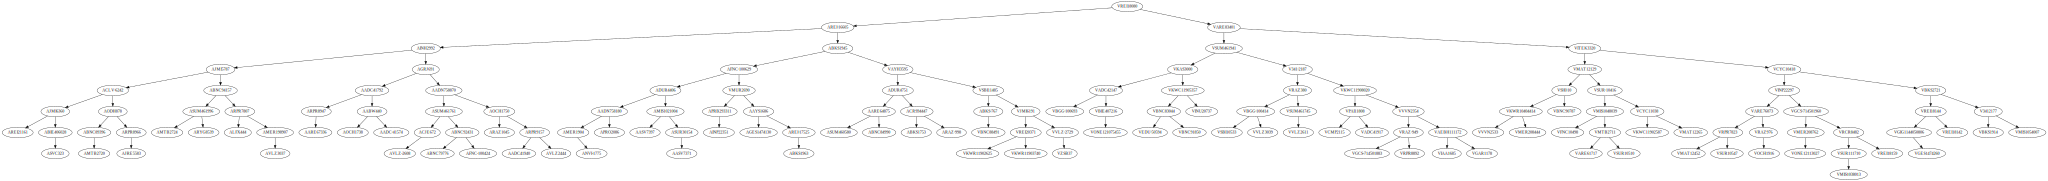

In [ ]:
tree.plot_tree()

1. INSERTAR NODO

In [ ]:
txt = ["Titulo" , "Departamento", "Ciudad" ,"Tipo de propiedad", "Latitud", "Longitud", "Superficie total" , "Superficie cubierta" , "Habitaciones" , "Baños", "Tipo de operación" , "Precio"]
data = []
for i in txt:
  x = input("\n"+ i + ": ")
  data.append(x)

new_property = Property(data[0],data[1],data[2],data[3],data[4],data[5],data[6],data[7],data[8],data[9],data[10],data[11])

tree.insert(new_property)

In [ ]:
tree.plot_tree()

2. ELIMINAR NODO POR METRICA

In [ ]:
dif = {}                        #Diccionario de métricas y códigos
for i in range(len(properties)):
  a = Node(properties[i]).metric
  b =  Node(properties[i]).info.title.split(" ")
  dif[f"Metrica 1, código de ciudad {i+1}"] = (a, b[-1])

print("\n".join(f"{k}: {v}" for k, v in dif.items()))
metric = input("\nIngrese la metrica que desea buscar para eliminar: ")

nodes = tree.find_node_by_metric(float(metric))

if len(nodes) > 1:
  print("\nLas propiedes que tienen esta metrica y serán eliminadas son: ")
  for i in nodes:
    print("\n"+ str(i.info.title))
    tree.delete(i)
elif len(nodes) == 1:
  print("\nLa propiedad que tiene esta metrica y será eliminada es: " + nodes[0].info.title)
  tree.delete(nodes[0])
else:
  print("\nNo existen propiedades con esta metrica.")

In [ ]:
tree.plot_tree()

3. BUSCAR NODO POR METRICA

In [ ]:
nodes_for_op = [] #lista en la que se guardan los nodos usados en las operaciones 3 y 4

In [ ]:

metric = input("\nIngrese la metrica que desea buscar: ")
nodes = tree.find_node_by_metric(float(metric))

if len(nodes) > 1:
  print("\nLas propiedes que tienen esta metrica son: ")
  for i in nodes:
    print("\n"+ str(i.info.title))
    nodes_for_op.append(i)
elif len(nodes) == 1:
  print("\nLa propiedad que tiene esta metrica es: " + nodes[0].info.title)
  nodes_for_op.append(nodes[0])
else:
  print("\nNo existen propiedades con esta metrica.")


Ingrese la metrica que desea buscar: 10000

Las propiedes que tienen esta metrica son: 

Apartamento En Arriendo En Medellin Laureles La Castellana Cod. ARPR8966

Apartamento En Arriendo En Bucaramanga Ciudadela Real De Minas Cod. AJRE5583


4. BUSCAR NODOS POR CRITERIOS

In [ ]:
c1=None
c2=None
c3=None
next=True
i=1
while next and i <= 3:
  op=input('Que criterio quiere seleccionar (escriba el numero): \n 1. Departamento \n 2. ciudad \n 3. tipo de propiedad \n 4. tipo de operacion \n 5. latitud \n 6. longitud \n 7. superficie total \n 8. superficie cubierta \n 9. baños \n 10. cuartos \n 11. precio \n')
  op=int(op)
  print(op)
  op2=input('Desea elegir otro criterio?')
  if op2 =='no':
    next=False
  if i == 1:
    c1=op
  elif i == 2:
    c2=op
  elif i == 3:
    c3=op
  i=i+1

In [ ]:

nodes = tree.multiple_search(c1,c2,c3)
for i in nodes:
  print(i.info.city, i.info.operation_type, i.info.price)

In [ ]:
m = folium.Map(location=[6, -72], zoom_start=6, zoom_control=False)
for u in nodes:
  folium.Marker([u.info.latitude, u.info.longitude], tooltip=u.info.title).add_to(m)
display(m)

5. RECORRIDO POR NIVELES DEL ARBOL

In [ ]:
queuep = QueueP(300)
tree.level_order()

#OPCIONES ADICIONALES
estas opciones deben ejecutarse justo despues de ejecutar los procedimientos que pueden usar dichas opciones.

A. OBTENER NIVEL DEL NODO

In [ ]:
print(f"Los nodos usados en las opciones 3 y 4 son:")
for i in range(len(nodes_for_op)):
  print(f"\n{i+1}. {nodes_for_op[i].code()} con métrica {nodes_for_op[i].metric} \n")
x = input("\n¿Que nodo desea ver su nivel?: ")


for i in range(len(nodes_for_op)):
  if (nodes_for_op[i].code() == x):
    print(f"\nEl nivel del nodo {nodes_for_op[i].code()} es {nodes_for_op[i].nivel}")

#print(f"\nEl nivel del nodo {nodes_for_op[int(x)-1].code()} es")

Los nodos usados en las opciones 3 y 4 son:

1. ARPR8966 con métrica 10000.0 


2. AJRE5583 con métrica 10000.0 


¿Que nodo desea ver su nivel?: ARPR8966

El nivel del nodo ARPR8966 es 6


B. FACTOR DE BALANCEO DEL NODO


In [ ]:
print(f"Los nodos usados en las opciones 3 y 4 son:")
for i in range(len(nodes_for_op)):
  print(f"\n{i+1}. {nodes_for_op[i].code()}")
x = input("\n¿Que nodo desea ver su factor de balanceo?: ")
for i in range(len(nodes_for_op)):
  if x == nodes_for_op[i].code():
    print(f"\nEl factor de balanceo del nodo {nodes_for_op[i].code()} es {nodes_for_op[i].balance()}")

Los nodos usados en las opciones 3 y 4 son:

1. ARPR8966

2. AJRE5583

¿Que nodo desea ver su factor de balanceo?: ARPR8966

El factor de balanceo del nodo ARPR8966 es -1


C. ENCONTRAR PADRE DEL NODO

In [ ]:
print(f"Los nodos usados en las opciones 3 y 4 son:")
for i in range(len(nodes_for_op)):
  print(f"\n{i+1}. {nodes_for_op[i].code()}")
x = input("\n¿Que nodo desea conocer su padre?: ")
for i in range(len(nodes_for_op)):
  if x == nodes_for_op[i].code():
    p, pad = tree.search_node(nodes_for_op[i])
print(f"\nEl padre del nodo {p.code()} es {pad.code()}")
nodes_for_op.append(pad) #guardamos al padre para el mapa

Los nodos usados en las opciones 3 y 4 son:

1. ARPR8966

2. AJRE5583

¿Que nodo desea conocer su padre?: ARPR8966

El padre del nodo ARPR8966 es AODH878


D. ENCONTRAR ABUELO DEL NODO

In [ ]:
print(f"Los nodos usados en las opciones 3 y 4 son:")
for i in range(len(nodes_for_op)):
  print(f"\n{i+1}. {nodes_for_op[i].code()}")
x = input("\n¿Que nodo desea conocer su abuelo?: ")
for i in range(len(nodes_for_op)):
  if x == nodes_for_op[i].code():
    grandpa = tree.find_grandpa(nodes_for_op[i].info)
    print(f"\nEl abuelo del nodo {nodes_for_op[i].code()} es {grandpa.code()}")
nodes_for_op.append(grandpa) #guardamos al abuelo para el mapa

Los nodos usados en las opciones 3 y 4 son:

1. ARPR8966

2. AJRE5583

3. AODH878

¿Que nodo desea conocer su abuelo?: ARPR8966

El abuelo del nodo ARPR8966 es ACLV-6242


E. ENCONTRAR TIO DEL NODO

In [ ]:
print(f"Los nodos usados en las opciones 3 y 4 son:")
for i in range(len(nodes_for_op)):
  print(f"\n{i+1}. {nodes_for_op[i].code()}")
x = input("\n¿Que nodo desea conocer su tio?: ")
for i in range(len(nodes_for_op)):
  if x == nodes_for_op[i].code():
    a = tree.find_uncle(tree.root, None, None, nodes_for_op[i].info)
    print(f"\nEl tio de {nodes_for_op[i].code()} es  {a.code()}")

if a not in nodes_for_op:
  nodes_for_op.append(a) #guardamos al tio para el mapa

Los nodos usados en las opciones 3 y 4 son:

1. ARPR8966

2. AJRE5583

3. AODH878

4. ACLV-6242

¿Que nodo desea conocer su tio?: ARPR8966

El tio de ARPR8966 es  AJMI6360


BONIFICACIÓN

In [ ]:
# Crea un mapa centrado en una ubicación inicial
m = folium.Map(location=[6, -72], zoom_start=6, zoom_control=False)
for u in nodes_for_op:
# Añade un marcador en una ubicación específica
  folium.Marker([u.info.latitude, u.info.longitude], tooltip=u.info.title).add_to(m)
# Muestra el mapa en pantalla
display(m)
